### drone sentiment analysis

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

In [2]:
!pip install nltk TextBlob wordcloud --quiet

### Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("drone_reviews.csv")

In [5]:
df.head()

,Customer ID,Purchase Date,Drone Model,Price,Payment Method,Warranty,Usage Frequency,Purpose of Use,Customer Satisfaction,Customer Feedback
0,CUST001,2023-03-08,Skydio 2,2158.16,Debit Card,1 Year,Monthly,Professional Use,5,The Skydio 2 is excellent and exceeded my expe...
1,CUST002,2023-08-06,Parrot Anafi USA,1213.72,Credit Card,2 Years,Daily,Professional Use,4,"For the price of 1213.72, the Parrot Anafi USA..."
2,CUST003,2023-02-19,DJI Mini 2,1175.52,Cash,2 Years,Daily,Aerial Photography,2,I'm truly impressed with the DJI Mini 2. It's ...
3,CUST004,2023-05-11,Parrot Anafi USA,1772.46,PayPal,No Warranty,Weekly,Aerial Photography,3,I couldn't be happier with the Parrot Anafi US...
4,CUST005,2023-05-23,DJI Air 2S,1276.78,Credit Card,1 Year,Monthly,Aerial Photography,4,The DJI Air 2S is impressive and exceeded my e...


In [6]:
df.shape

(5000, 10)

In [7]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Drone Model              0
Price                    0
Payment Method           0
Warranty                 0
Usage Frequency          0
Purpose of Use           0
Customer Satisfaction    0
Customer Feedback        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            5000 non-null   object 
 1   Purchase Date          5000 non-null   object 
 2   Drone Model            5000 non-null   object 
 3   Price                  5000 non-null   float64
 4   Payment Method         5000 non-null   object 
 5   Warranty               5000 non-null   object 
 6   Usage Frequency        5000 non-null   object 
 7   Purpose of Use         5000 non-null   object 
 8   Customer Satisfaction  5000 non-null   int64  
 9   Customer Feedback      5000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB


In [9]:
df.drop(columns = ['Customer ID', 'Purchase Date' ], inplace = True)

In [10]:
df.rename(columns = {'Customer Satisfaction': 'Satisfaction', 'Customer Feedback': 'Feedback'}, inplace= True)

In [11]:
df.head()

,Drone Model,Price,Payment Method,Warranty,Usage Frequency,Purpose of Use,Satisfaction,Feedback
0,Skydio 2,2158.16,Debit Card,1 Year,Monthly,Professional Use,5,The Skydio 2 is excellent and exceeded my expe...
1,Parrot Anafi USA,1213.72,Credit Card,2 Years,Daily,Professional Use,4,"For the price of 1213.72, the Parrot Anafi USA..."
2,DJI Mini 2,1175.52,Cash,2 Years,Daily,Aerial Photography,2,I'm truly impressed with the DJI Mini 2. It's ...
3,Parrot Anafi USA,1772.46,PayPal,No Warranty,Weekly,Aerial Photography,3,I couldn't be happier with the Parrot Anafi US...
4,DJI Air 2S,1276.78,Credit Card,1 Year,Monthly,Aerial Photography,4,The DJI Air 2S is impressive and exceeded my e...


In [12]:
df.columns

Index(['Drone Model', 'Price', 'Payment Method', 'Warranty', 'Usage Frequency',
       'Purpose of Use', 'Satisfaction', 'Feedback'],
      dtype='object')

### Data Visualization

In [13]:
df['Warranty'].value_counts()

No Warranty    1695
2 Years        1655
1 Year         1650
Name: Warranty, dtype: int64

In [14]:
df['Purpose of Use'].value_counts()

Recreation            1679
Aerial Photography    1675
Professional Use      1646
Name: Purpose of Use, dtype: int64

<AxesSubplot:xlabel='Warranty', ylabel='count'>

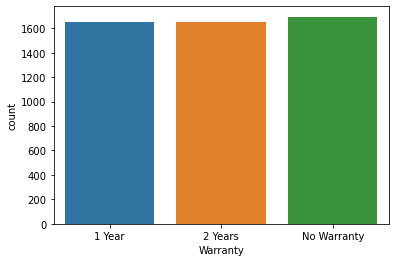

In [15]:
sns.countplot(data = df, x= df['Warranty'])

<AxesSubplot:xlabel='Purpose of Use', ylabel='count'>

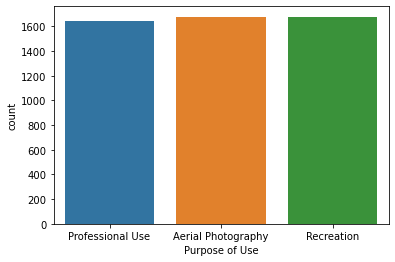

In [16]:
sns.countplot(data = df, x= df['Purpose of Use'])

<AxesSubplot:xlabel='Price', ylabel='Warranty'>

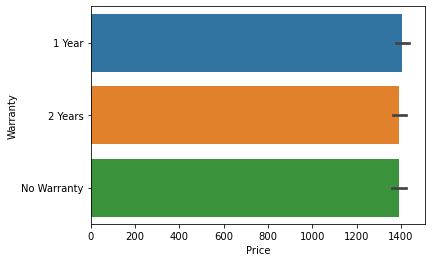

In [20]:
sns.barplot(data = df, x= df['Price'], y= df['Warranty'])

<AxesSubplot:xlabel='Warranty', ylabel='count'>

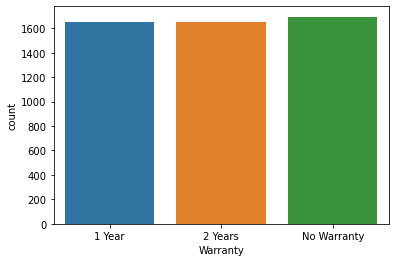

In [21]:
sns.countplot(data = df, x= df['Warranty'])

<AxesSubplot:xlabel='Price', ylabel='Usage Frequency'>

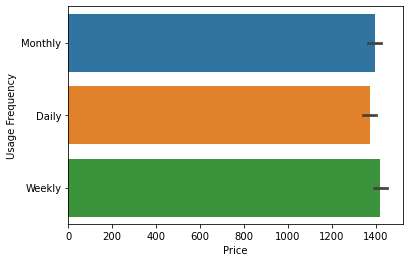

In [22]:
sns.barplot(data = df, x= df['Price'], y= df['Usage Frequency'])

### Sentiment Analysis

In [23]:
df[['Satisfaction','Feedback']].head(5)

,Satisfaction,Feedback
0,5,The Skydio 2 is excellent and exceeded my expe...
1,4,"For the price of 1213.72, the Parrot Anafi USA..."
2,2,I'm truly impressed with the DJI Mini 2. It's ...
3,3,I couldn't be happier with the Parrot Anafi US...
4,4,The DJI Air 2S is impressive and exceeded my e...


In [24]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Sagar
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sagar
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{"wouldn't", 'hadn', 'herself', 'wasn', "don't", 'was', 'why', 'my', 'mightn', 'did', 'are', 'most', 'there', 'him', 'of', 'here', 'above', 'yours', 'if', 'because', 'than', 'how', 'about', "didn't", "shouldn't", 'it', 'have', 'this', 'from', 'or', 'to', 'where', 'd', 'does', 'but', 'don', 'y', 'no', 'he', 'you', 'has', "should've", 'were', 'his', 'isn', 'aren', 'for', 'haven', 'me', 'itself', 'with', 'ain', 'under', 'himself', 'can', 'o', 'themselves', 'who', 'doing', 'both', 'weren', 'further', 'up', 'against', 'all', "that'll", 'through', 'these', 'yourself', 'not', 'whom', 'having', 'same', 'on', "hadn't", 't', 'won', 'am', 've', 'down', "you've", 'be', 'an', 'your', 'too', 'i', 'just', "wasn't", 'nor', "you'll", "you're", 'only', "shan't", 'had', 'while', "mightn't", 'own', "mustn't", 'we', 'more', 'other', 'been', 'shan', 'hers', 'very', 'its', 'then', 'ma', 'myself', 'needn', 'do', 'ourselves', 'their', 'each', 'yourselves', 're', 'such', 'ours', "she's", 'couldn', 'those', "you

In [27]:
len(nltk_stopwords)

179

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'might', 'take', 'find', 'move', 'became', 'seem', 'why', 'my', 'formerly', 'enough', 'are', 'un', 'side', 'fill', 'twelve', 'six', 'behind', 'fifty', 'him', 'above', 'than', 'yours', 'if', 'about', 'could', 'third', 'thereupon', 'etc', 'or', 'twenty', 'still', 'to', 'where', 'well', 'meanwhile', 'but', 'whole', 'has', 'although', 'five', 'beforehand', 'me', 'whereupon', 'even', 'itself', 'others', 'cannot', 'anyway', 'go', 'last', 'amoungst', 'can', 'indeed', 'call', 'themselves', 'who', 'someone', 'bottom', 'done', 'further', 'all', 'against', 'wherever', 'through', 'full', 'these', 'yourself', 'thin', 'thru', 'every', 'thereafter', 'same', 'whence', 'front', 'latterly', 'many', 'ten', 'your', 'too', 'bill', 'made', 'seems', 'name', 'de', 'co', 'would', 'had', 'while', 'becoming', 'sometimes', 'noone', 'nowhere', 'more', 'afterwards', 'been', 'please', 'nothing', 'two', 'serious', 'anywhere', 'con', 'anyhow', 'give', 'whoever', 'anyone', 'below', 'found', 'onto', 'off', 'ie', 'latte

In [29]:
len(sklearn_stopwords)

318

In [30]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'herself', 'why', 'was', 'my', 'most', 'are', 'there', 'him', 'of', 'here', 'above', 'yours', 'because', 'if', 'than', 'how', 'about', 'it', 'have', 'this', 'from', 'or', 'to', 'where', 'but', 'no', 'he', 'you', 'has', 'were', 'his', 'for', 'me', 'itself', 'with', 'under', 'himself', 'can', 'themselves', 'who', 'both', 'further', 'up', 'against', 'all', 'through', 'these', 'yourself', 'not', 'whom', 'same', 'on', 'am', 'down', 'be', 'an', 'your', 'too', 'i', 'nor', 'only', 'had', 'while', 'own', 'we', 'more', 'other', 'been', 'hers', 'very', 'its', 'then', 'myself', 'do', 'ourselves', 'their', 'each', 'yourselves', 're', 'such', 'ours', 'those', 'should', 'below', 'over', 'in', 'off', 'which', 'until', 'so', 'by', 'at', 'they', 'is', 'when', 'before', 'few', 'out', 'a', 'she', 'once', 'into', 'what', 'any', 'them', 'being', 'between', 'as', 'after', 'some', 'now', 'again', 'her', 'our', 'the', 'during', 'and', 'will', 'that'}


In [31]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [32]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [33]:
len(combined_stopwords)

378

In [34]:
domain_stopwords = [ '2', 'price', '1213.72,', 'use.', "i'm" ]
final_stopwords = domain_stopwords + list(combined_stopwords)

In [35]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [36]:
#create an empty list to collect cleaned data corpus
cleaned_feedback =[]

In [37]:
#loop through each review, remove punctuations, lower case it, join it and add it to corpus
for rev in df['Feedback']:
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in final_stopwords]
    rev = " ".join(rev)
    cleaned_feedback.append(rev)

In [38]:
# add the corpus to the original dataframe
df['Cleaned_Feedback'] = cleaned_feedback

In [39]:
df.head(5)

,Drone Model,Price,Payment Method,Warranty,Usage Frequency,Purpose of Use,Satisfaction,Feedback,Cleaned_Feedback
0,Skydio 2,2158.16,Debit Card,1 Year,Monthly,Professional Use,5,The Skydio 2 is excellent and exceeded my expe...,skydio excellent exceeded expectations. fantas...
1,Parrot Anafi USA,1213.72,Credit Card,2 Years,Daily,Professional Use,4,"For the price of 1213.72, the Parrot Anafi USA...",parrot anafi usa offer impressive performance....
2,DJI Mini 2,1175.52,Cash,2 Years,Daily,Aerial Photography,2,I'm truly impressed with the DJI Mini 2. It's ...,truly impressed dji mini 2. reliable amazing a...
3,Parrot Anafi USA,1772.46,PayPal,No Warranty,Weekly,Aerial Photography,3,I couldn't be happier with the Parrot Anafi US...,happier parrot anafi usa. satisfying amazing a...
4,DJI Air 2S,1276.78,Credit Card,1 Year,Monthly,Aerial Photography,4,The DJI Air 2S is impressive and exceeded my e...,dji air 2 impressive exceeded expectations. te...


Let us see now polarity and sentiment of the cleaned review.

In [40]:
from textblob import TextBlob

In [41]:
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
        
def sentiment(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'

In [42]:
df['Polarity'] = df['Cleaned_Feedback'].apply(polarity)

In [43]:
df['Sentiment'] = df['Polarity'].apply(sentiment)

In [44]:
df.head()

,Drone Model,Price,Payment Method,Warranty,Usage Frequency,Purpose of Use,Satisfaction,Feedback,Cleaned_Feedback,Polarity,Sentiment
0,Skydio 2,2158.16,Debit Card,1 Year,Monthly,Professional Use,5,The Skydio 2 is excellent and exceeded my expe...,skydio excellent exceeded expectations. fantas...,0.50,Positive
1,Parrot Anafi USA,1213.72,Credit Card,2 Years,Daily,Professional Use,4,"For the price of 1213.72, the Parrot Anafi USA...",parrot anafi usa offer impressive performance....,0.50,Positive
2,DJI Mini 2,1175.52,Cash,2 Years,Daily,Aerial Photography,2,I'm truly impressed with the DJI Mini 2. It's ...,truly impressed dji mini 2. reliable amazing a...,0.80,Positive
3,Parrot Anafi USA,1772.46,PayPal,No Warranty,Weekly,Aerial Photography,3,I couldn't be happier with the Parrot Anafi US...,happier parrot anafi usa. satisfying amazing a...,0.55,Positive
4,DJI Air 2S,1276.78,Credit Card,1 Year,Monthly,Aerial Photography,4,The DJI Air 2S is impressive and exceeded my e...,dji air 2 impressive exceeded expectations. te...,0.50,Positive


The above result is obtained after cleaning the feedback data with new addition of polarity and sentiment.

Words used to express in feedback.

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [ ]:
text = str(" ".join(df.Cleaned_Feedback))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['skydio', 'excellent', 'exceeded', 'expectations.', 'fantastic', 'professional', 'parrot', 'anafi', 'usa', 'offer', 'impressive', 'performance.', 'fantastic', 'professional', 'truly', 'impressed', 'dji', 'mini', '2.', 'reliable', 'amazing', 'aerial', 'photography.', 'happier', 'parrot', 'anafi', 'usa.', 'satisfying', 'amazing', 'aerial', 'photography.', 'dji', 'air', '2', 'impressive', 'exceeded', 'expectations.', 'terrific', 'aerial', 'photography.', 'autel', 'evo', 'lite+', 'impressive', 'exceeded', 'expectations.', 'amazing', 'recreation.', 'skydio', 'x2']


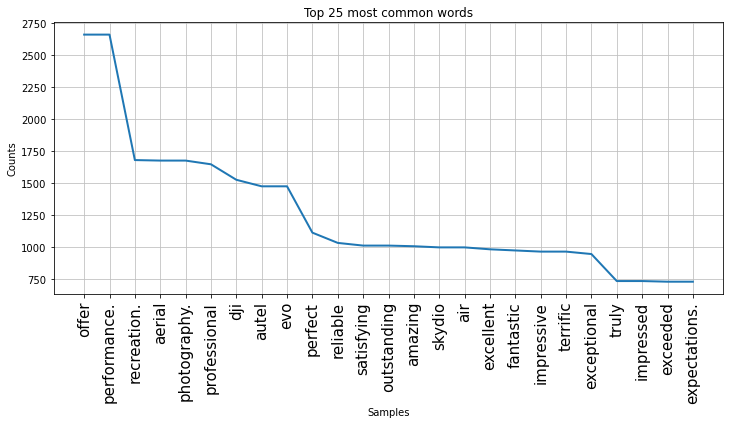

In [45]:
# Write the code for plotting the Cleaned Feedback

all_words = []
for t in df["Cleaned_Feedback"]:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

The frequency chart above shows that the key words within the customer feedback include offer, performance, recreation, aerial, etc shows that people are actively expressing sentiment related to drone price and drone working using these words.

### Sentiment of Customers

In [46]:
df["Sentiment"].value_counts(normalize=True)*100

Positive    97.7
Neutral      2.3
Name: Sentiment, dtype: float64

<Figure size 1080x1080 with 0 Axes>

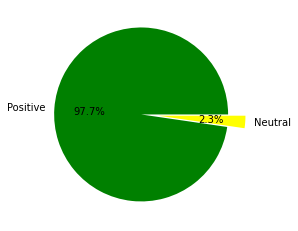

In [47]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df["Sentiment"].value_counts(normalize=True) * 100

# create the pie chart
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'yellow'], 
    explode=[0.1, 0.1], 
    autopct='%1.1f%%'
    )

plt.show()

In the above pie diagram, we can see 97.7 % positive sentiment and 2.3 % is neutral sentiment.